# Gradient Descent Implementation

Consolidate your implementations of the gradient descent algorithm here.  Try to combine the best features of all of your individual preclass work.  As you work through the code, be sure to raise any confusions you had when writing the gradient descent / line searching code with your group members, and attempt to resolve these within your groups.  If there are any confusions outstanding, be sure to list these down for discussion after the breakout.  You may want to include an iteration limit in the loop for the gradient descent.  Some templates are provided for the function and its gradient, but feel free to modify these as you see fit!

Once you have consolidated your implementations, use your implementation to find the minimum of the Rosenbrock function:
    $f(x,y) = (1-x)^2 + 100(y-x^2)^2$,
to a tolerance of $|x_{k+1} - x_{k}| \leq 1\times10^{-6}$.  Use this tolerance for the line search interval size also.  Experiment with the following:

1. Try optimizing first without any line search.  That is, use a fixed proportion of the gradient as a step size in the descent direction at each step.  Record your observations for different step sizes and starting points.  Is there a step size that leads the algorithm to diverge?
2. Add in the line search with bisection and evaluate the effect.  Is there an improvement in convergence?


In [18]:
# Implement gradient descent here

import numpy as np

def f(x,y):
    # Function definition here
    return (1-x)**2 + 100*(y-x**2)**2

def gradf(x,y):
    # Gradient definition here
    return np.array([2*(x-1) + 200*(y - x**2)*(-2*x), 200*(y-x**2)])
def hessian(x, y):
    return np.array([[1200*x**2-400*y+2, -400*x], [-400*x, 200]])

X0 = np.array([-0.8,1]) # Starting state


X = X0
step = 1

for i in range(0,1000):
    hessian_inv = np.linalg.inv(hessian(X[0], X[1]))
    X_new = X - step*np.matmul(hessian_inv, gradf(X[0], X[1]))
#     X_new = X - step*(hessian_inv*gradf(X[0], X[1]))
    print(X)
    if np.linalg.norm(np.array(X) - np.array(X_new)) <= 1e-6:
        break
    X = X_new

[-0.8  1. ]
[-0.82535211  0.68056338]
[ 0.79208505 -1.98870424]
[0.79248166 0.62802703]
[0.99999347 0.95692579]
[0.99999415 0.9999883 ]
[1. 1.]


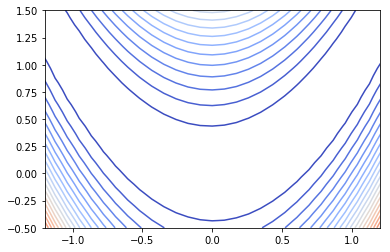

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Rosenbrock function

f = lambda x,y:  100*(y - x**2)**2 + (x - 1)**2

# plot
X, Y = np.meshgrid(np.linspace(-1.3, 1.3, 31), np.linspace(-0.5, 1.5, 31))
Z = f(X,Y)
plt.figure()
plt.contour(X, Y, Z, 25, cmap='coolwarm')

plt.xlim(-1.2, 1.2)
plt.ylim(-0.5, 1.5)
plt.show()

# plt.legend(loc='lower right')